In [1]:
import os 
import pandas as pd

In [31]:
path = 'C:\\Users\\adam1brownell\\Desktop\\BCI Data\\SurfData'
os.getcwd()
os.chdir(path)

In [59]:
eeg_header = pd.read_excel('7_surf_eeg_names.xlsx', header = None)
x = [eeg_header.ix[0,i] for i in range(33)]
eeg_data = pd.read_excel('7_surf_eeg.xlsx', header = None, names = x)
eeg_data.head()

,Surf,Fp1,Fp2,F7,F3,Fz,F4,F8,FC5,FC1,...,P7,P3,Pz,P4,P8,PO9,O1,Oz,O2,PO10
0,1,290,234,419,-72,-300,90,163,-201,-153,...,392,219,56,90,418,86,438,-111,126,88
1,1,171,213,371,-95,-316,102,136,-233,-169,...,348,198,35,87,419,93,442,-130,115,81
2,1,169,220,373,-100,-317,92,130,-195,-170,...,362,206,45,53,405,98,420,-142,77,52
3,1,225,206,370,-77,-300,114,152,-182,-165,...,405,200,47,60,406,229,459,-108,106,59
4,1,245,194,377,-62,-271,129,157,-182,-147,...,381,185,37,62,410,203,463,-96,121,72


In [69]:
eeg_labels = eeg_data['Surf']
eeg_data.drop('Surf', 1, inplace = True)
eeg_data.head()

,Fp1,Fp2,F7,F3,Fz,F4,F8,FC5,FC1,FC2,...,P7,P3,Pz,P4,P8,PO9,O1,Oz,O2,PO10
0,290,234,419,-72,-300,90,163,-201,-153,-50,...,392,219,56,90,418,86,438,-111,126,88
1,171,213,371,-95,-316,102,136,-233,-169,-48,...,348,198,35,87,419,93,442,-130,115,81
2,169,220,373,-100,-317,92,130,-195,-170,-53,...,362,206,45,53,405,98,420,-142,77,52
3,225,206,370,-77,-300,114,152,-182,-165,-43,...,405,200,47,60,406,229,459,-108,106,59
4,245,194,377,-62,-271,129,157,-182,-147,-19,...,381,185,37,62,410,203,463,-96,121,72


Clean the data

In [70]:
#Filter Function
def apply_filters(x, order=4, fs=512.0, filt=None, btype='low', axis=0):
    from scipy.signal import butter, filtfilt
    nyq = .5 * fs
    
    if filt is None:
        return x
    if isinstance(filt, list):
        f = [i/nyq for i in filt]
        btype='band'
    else:
        f = filt/nyq
        
    b, a = butter(order, f, btype=btype, analog=False)
    x = filtfilt(b, a, x, axis=axis)
    return x

In [80]:
#Band Pass
import matplotlib.pyplot as plt

#Grab all data from one node
raw3 = eeg_data.ix[:,3]
bp_eeg = apply_filters(raw3, order = 4, fs = 64, filt = [12,30], btype = 'band')

#Separate into trial type
surf1 = []
surf2 = []
surf3 = []

for i in range(eeg_labels.size):
    if eeg_labels[i] == 1:
        surf1.append(raw3[i])
    elif eeg_labels[i] == 2:
        surf2.append(raw3[i])
    elif eeg_labels[i] == 3:
        surf3.append(raw3[i])
    else:
        print eeg_labels[i]


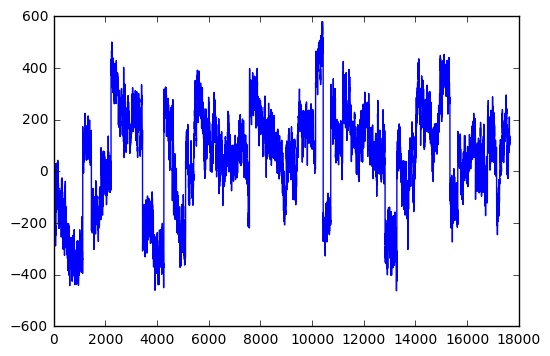

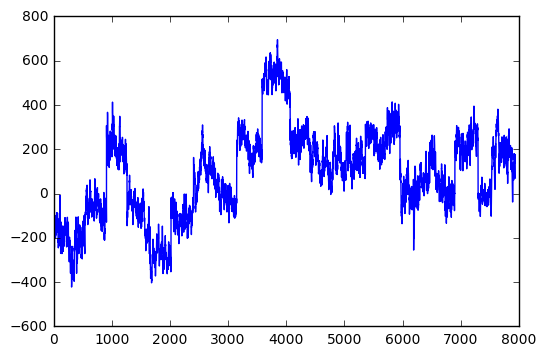

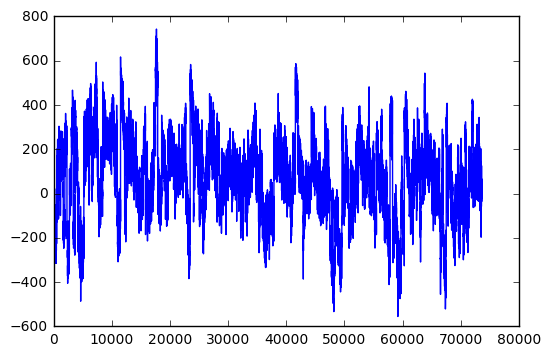

In [84]:
time1 = [i for i in range(len(surf1))]
time2 = [i for i in range(len(surf2))]
time3 = [i for i in range(len(surf3))]
plt.plot(time1,surf1)
plt.show()
plt.plot(time2, surf2)
plt.show()
plt.plot(time3,surf3)
plt.show()

In [86]:
eeg_c3 = eeg_data['C3']

In [91]:
print len(surf1)
print len(surf2)
print len(surf3)

690
1655
451


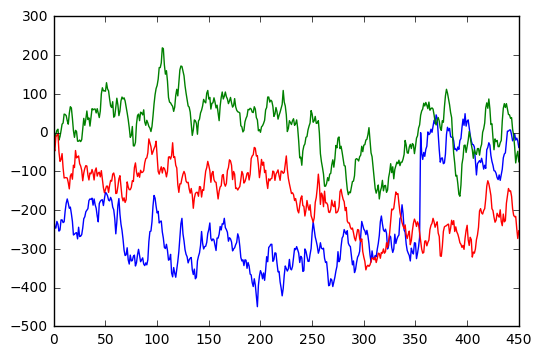

In [95]:
time = [i for i in range(len(surf3))]
plt.plot(time, surf1[:len(time)])
plt.plot(time, surf2[:len(time)])
plt.plot(time, surf3[:len(time)])
plt.show()

In [97]:
#Find the mean of each trial-ish
import numpy as np
one = False
two = False
three = False
i = 0
surf1 = []
surf2 = []
surf3 = []
mean1 = []
mean2 = []
mean3 = []
while i < eeg_labels.size:
    
    if eeg_labels[i] == 1 and not one:
        one = True
        while eeg_labels[i] == 1:
            surf1.append(eeg_c3[i])
            i = i + 1
    elif eeg_labels[i] == 2 and not two:
        two = True
        while eeg_labels[i] == 2:
            surf2.append(eeg_c3[i])
            i = i + 1
    elif eeg_labels[i] == 3 and not three:
        three = True
        while eeg_labels[i] == 3:
            surf3.append(eeg_c3[i])
            i = i + 1
            
    if one and two and three:
        mean1.append(np.mean(surf1))
        mean2.append(np.mean(surf2))
        mean3.append(np.mean(surf3))
        surf1 = []
        surf2 = []
        surf3 = []
        one = False
        two = False
        three = False
    i = i + 1

In [99]:
print len(mean1)
print len(mean2)
print len(mean3)

8
8
8


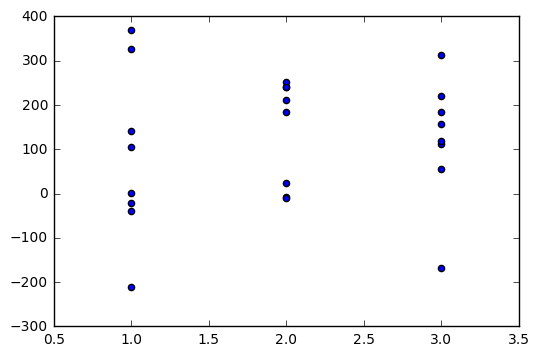

In [104]:
ones = [1 for i in range(len(mean1))]
twos = [2 for i in range(len(mean1))]
threes = [3 for i in range(len(mean1))]
plt.scatter(ones,mean1)
plt.scatter(twos,mean2)
plt.scatter(threes, mean3)
plt.show()

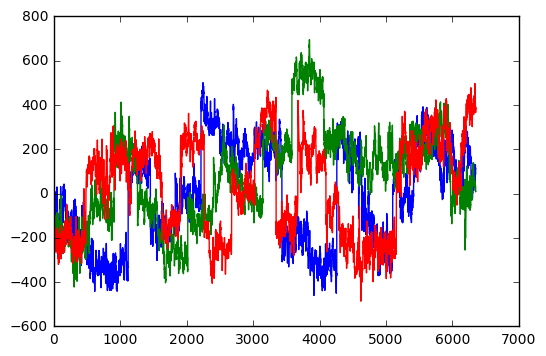

In [107]:
#Separate into trial type
surf1 = []
surf2 = []
surf3 = []

for i in range(eeg_labels.size):
    if eeg_labels[i] == 1:
        surf1.append(raw3[i])
    elif eeg_labels[i] == 2:
        surf2.append(raw3[i])
    elif eeg_labels[i] == 3:
        surf3.append(raw3[i])
    else:
        print eeg_labels[i]
        
#Pick size all materials can be graphed along
sizr = int(np.min([len(surf1),len(surf2),len(surf3)])*.8)
time = [i for i in range(sizr)]

#Plot larger amount of data
plt.plot(time,surf1[:sizr])
plt.plot(time,surf2[:sizr])
plt.plot(time, surf3[:sizr])
plt.show()

In [108]:
list(eeg_data)

[u'Fp1',
 u'Fp2',
 u'F7',
 u'F3',
 u'Fz',
 u'F4',
 u'F8',
 u'FC5',
 u'FC1',
 u'FC2',
 u'FC6',
 u'T7',
 u'C3',
 u'Cz',
 u'C4',
 u'T8',
 u'TP9',
 u'CP5',
 u'CP1',
 u'CP2',
 u'CP6',
 u'TP10',
 u'P7',
 u'P3',
 u'Pz',
 u'P4',
 u'P8',
 u'PO9',
 u'O1',
 u'Oz',
 u'O2',
 u'PO10']

In [112]:
eeg_data['C3'].describe()

count    99251.000000
mean       169.222325
std        165.683353
min       -449.000000
25%         53.000000
50%        178.000000
75%        283.000000
max        839.000000
Name: C3, dtype: float64

In [113]:
#Generate 5 number summary for each node per trial, maintaining labels
#First separate it into trials
#Or have Yasha send me a www.r

In [153]:
#function that will run PCA + LDA on a given dataset
def prepro (dataset, labels):
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    import sklearn.cross_validation as cv
    import matplotlib.pyplot as plt
    import sklearn.preprocessing as prepro
    import numpy as np
    print "building scaled dataset..."
    x_scaled = prepro.scale(dataset)
    
    
    #Try PCA and build Scree Plot
    
    from sklearn.decomposition import PCA
    import sklearn.preprocessing as prepro
    print "Running PCA..."
    #Scaled PCA
    pca = PCA()
    pca.fit_transform(x_scaled)
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.title('Scaled Scree Plot')
    plt.show()
    
    #Un-Scaled PCA
    pca = PCA()
    pca.fit_transform(x_scaled)
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.title('Un-Scaled Scree Plot')
    plt.show()
    
    print "Running LDA..."
    #Scaled LDA
    lda = LinearDiscriminantAnalysis()
    x_train, x_test, y_train, y_test = cv.train_test_split(x_scaled, labels)
    lda.fit(x_train,y_train)
    print "Scaled LDA Acc: ", lda.score(x_test,y_test)
    
    #Un-Scaled LDA
    lda = LinearDiscriminantAnalysis()
    x_train, x_test, y_train, y_test = cv.train_test_split(dataset, labels)
    lda.fit(x_train,y_train)
    print "Un-Scaled LDA Acc: ", lda.score(x_test,y_test)
    

In [148]:
#Separate into Trials
def trialz(dataset):
    i = 0
    j = .90
    surf1 = []
    surf2 = []
    surf3 = []
    while i <= eeg_labels.size:
        if eeg_labels[i] == 1 and not one:
            trial = []
            while eeg_labels[i] == 1:
                trial.append(eeg_c3[i
                                   ])
                i = i + 1
            surf1.append(trial)
        elif eeg_labels[i] == 2 and not two:
            trial = []
            while eeg_labels[i] == 2:
                trial.append(eeg_c3[i])
                i = i + 1
            surf2.append(trial)
        elif eeg_labels[i] == 3 and not three:
            trial = []
            while eeg_labels[i] == 3:
                trial.append(eeg_c3[i])
                i = i + 1
            surf3.append(trial)
            
        if i + (j*eeg_labels.size) >= eeg_labels.size:
            print (1-j)*100, "% done"
            j = j - .10
        
    return surf1, surf2, surf3

In [155]:
#Convolutional Neural Network

def cnn(dataset,labels):
    import sklearn.cross_validation as cv
    
    x_train, x_test, y_train, y_test = cv.train_test_split(dataset, labels)
    
    #Reshape Data- RBG photos have depth of 3
    x_train = x_train.reshape(x_train.shape[0],3,100,100) #The 100 was arbitrary see how big a spectrogram is
    x_test = x_test.reshape(x_test.shape[0],3,100,100) #The 100 was arbitrary see how big a spectrogram is
    
    
    #Convert Data Type and Normalize Values
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    
    #Preprocess class labels
    y_train = np_util.to_categorical(y_train, 10)
    y_test = np_util.to_categorical(y_test, 10)
    
    #Define Model Architecture
    
    from keras import Sequential
    
    cnn = Sequential()
    cnn.add(Convolution2D(32,3,3 activation = 'relu', input_shape = (3,100,100)))
    cnn.add(Convoltion2D(32,3,3, activation = 'relu'))
    cnn.add(MaxPooling2D(pool_size = (2,2)))
    cnn.add(Dropout(0.25))
    
    
    
    
    

In [140]:
big5 = pd.read_excel('7_surf_eeg_stats.xlsx', header = 0)

In [141]:
big5.head()

,Surf,Int,Mean_Fp1,Mean_Fp2,Mean_F7,Mean_F3,Mean_Fz,Mean_F4,Mean_F8,Mean_FC5,...,Max_P7,Max_P3,Max_Pz,Max_P4,Max_P8,Max_PO9,Max_O1,Max_Oz,Max_O2,Max_PO10
0,1,355,226.938034,286.411255,290.642242,-107.774651,-290.783112,167.090134,169.585922,-203.983093,...,465,349,175,218,526,241,612,99,299,184
1,1,335,361.755219,484.035828,116.504478,-256.973145,-231.011948,65.208954,-159.519409,-266.859711,...,197,-97,91,141,247,180,204,-55,163,-6
2,2,535,-497.321503,-226.000000,-411.708405,-209.190659,-274.063538,-91.811218,-22.770094,-301.405609,...,199,131,261,229,242,410,597,319,389,177
3,2,372,466.559143,846.758057,235.494629,-65.454300,-61.325268,135.811829,122.287636,-78.180107,...,-26,-81,59,131,90,286,338,96,-275,-87
4,2,353,791.365417,892.671387,522.983032,208.209625,-16.889519,-5.444759,74.543907,-101.311615,...,297,-59,161,167,301,26,418,268,118,214


In [143]:
labels = big5['Surf']

In [144]:
big5.drop('Surf', 1, inplace = True)
big5.head()

,Int,Mean_Fp1,Mean_Fp2,Mean_F7,Mean_F3,Mean_Fz,Mean_F4,Mean_F8,Mean_FC5,Mean_FC1,...,Max_P7,Max_P3,Max_Pz,Max_P4,Max_P8,Max_PO9,Max_O1,Max_Oz,Max_O2,Max_PO10
0,355,226.938034,286.411255,290.642242,-107.774651,-290.783112,167.090134,169.585922,-203.983093,-197.887329,...,465,349,175,218,526,241,612,99,299,184
1,335,361.755219,484.035828,116.504478,-256.973145,-231.011948,65.208954,-159.519409,-266.859711,-161.095520,...,197,-97,91,141,247,180,204,-55,163,-6
2,535,-497.321503,-226.000000,-411.708405,-209.190659,-274.063538,-91.811218,-22.770094,-301.405609,-129.747665,...,199,131,261,229,242,410,597,319,389,177
3,372,466.559143,846.758057,235.494629,-65.454300,-61.325268,135.811829,122.287636,-78.180107,-143.161285,...,-26,-81,59,131,90,286,338,96,-275,-87
4,353,791.365417,892.671387,522.983032,208.209625,-16.889519,-5.444759,74.543907,-101.311615,-81.036827,...,297,-59,161,167,301,26,418,268,118,214


building scaled dataset...
Running PCA...


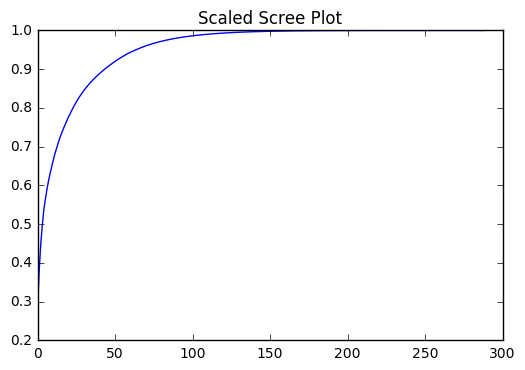

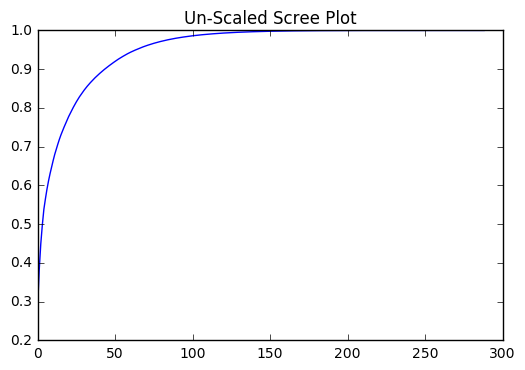

Running LDA...
Scaled LDA Acc:  0.432432432432
Un-Scaled LDA Acc:  0.459459459459


In [154]:
prepro(big5,labels)

In [156]:
binary5 = pd.read_excel('6_surf_eeg_stats.xlsx', header = 0)
binary5.head()

,Surf,Interval,Mean_Fp1,Mean_Fp2,Mean_F7,Mean_F3,Mean_Fz,Mean_F4,Mean_F8,Mean_FC5,...,Max_P7,Max_P3,Max_Pz,Max_P4,Max_P8,Max_PO9,Max_O1,Max_Oz,Max_O2,Max_PO10
0,1,358,245.195526,381.684357,433.513977,-5.896648,130.639664,404.393860,140.441345,187.743011,...,731,345,346,535,1122,724,898,579,483,774
1,1,304,525.697388,519.786194,192.213821,155.516449,51.309212,306.365143,503.730255,248.608551,...,647,320,478,486,630,392,424,462,255,701
2,1,284,337.200714,539.250000,578.901428,29.510563,174.066895,455.954224,592.841553,388.933105,...,772,259,361,452,839,597,544,439,235,839
3,1,300,449.533325,344.369995,355.283325,246.393326,50.113335,431.583344,216.000000,405.329987,...,895,677,650,699,779,645,884,891,695,782
4,1,257,211.902725,504.046692,315.400787,189.268478,86.630348,408.879364,490.529175,477.809326,...,699,469,502,760,728,426,379,696,452,680


In [157]:
from collections import Counter
Counter(binary5['Surf'])

Counter({0: 51, 1: 51})

In [158]:
binarylabels = binary5['Surf']
binary5.drop('Surf', 1, inplace = True)

building scaled dataset...
Running PCA...


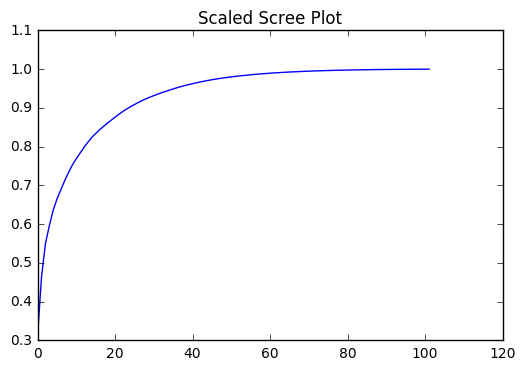

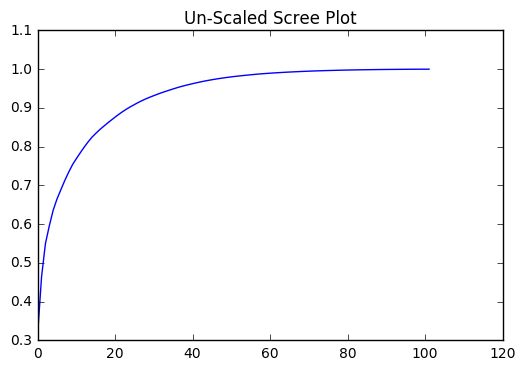

Running LDA...
Scaled LDA Acc:  0.769230769231
Un-Scaled LDA Acc:  0.769230769231


In [159]:
prepro(binary5,binarylabels)

In [160]:
def log_regress(dataset, labels):
    import sklearn.cross_validation as cv
    from sklearn.linear_model import LogisticRegression
    import sklearn.metrics as met
    
    x_train, x_test, y_train, y_test = cv.train_test_split(dataset, labels)
    logR = LogisticRegression()
    logR.fit(x_train,y_train)
    lr_predict = logR.predict_proba(x_test)
    
    #ROC Curve
    fpr1, tpr1, treshholds = met.roc_curve(y_test, lr_predict[:,1])
    x1 = [0,1]
    y1 = [0,1]
    plt.plot(fpr1,tpr1)
    plt.plot(x1,y1)
    plt.title('ROC Curve (Raw)')
    plt.show()
    print "AUC: ", met.auc(fpr1,tpr1)
    print "Accuracy: ", logR.score(x_test,y_test)

    logR2 = LogisticRegression()
    logR2.fit_transform(x_train,y_train)
    lr_predict = logR2.predict_proba(x_test)
    fpr1, tpr1, treshholds = met.roc_curve(y_test, lr_predict[:,1])
    plt.plot(fpr1,tpr1)
    plt.plot(x1,y1)
    plt.title('ROC Curve (Transform)')
    plt.show()
    print "AUC: ", met.auc(fpr1,tpr1)
    print "Accuracy: ", logR2.score(x_test,y_test)

    

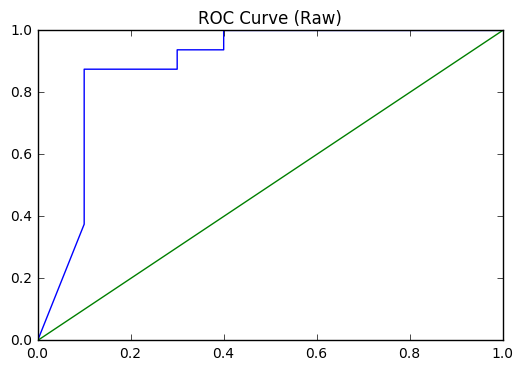

AUC:  0.8875
Accuracy:  0.884615384615


C:\Users\adam1brownell\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


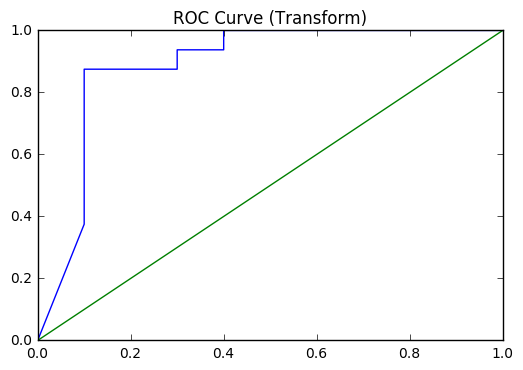

AUC:  0.8875
Accuracy:  0.884615384615


In [161]:
log_regress(binary5, binarylabels)

In [165]:
eeg_labels[3]

1

building scaled dataset...
Running PCA...


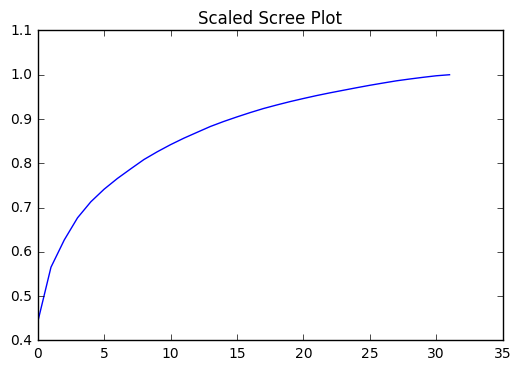

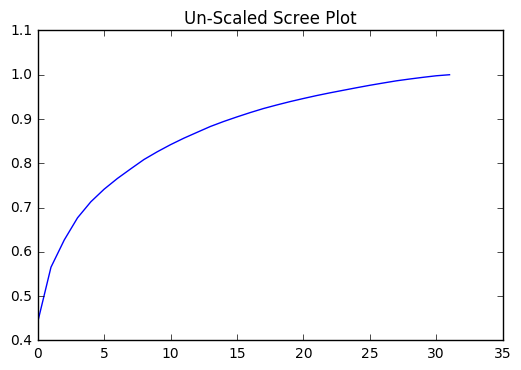

Running LDA...


ValueError: Found arrays with inconsistent numbers of samples: [  294 99251]

In [177]:
prepro(eeg_data,labels)

In [173]:
Counter(binary_labels)

Counter({1: 17652, 2: 7941})